In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
class PCA:
    def __init__ (self,n_components):
        self.n_components=n_components
        self.components=None
        self.mean=None

    def fit(self,X):
        self.mean=np.mean(X,axis=0)
        X=X-self.mean

        cov=np.cov(X.T)

        eigenvectors,eigenvalues=np.linalg.eig(cov)

        eigenvectors=eigenvectors.T

        idxs=np.argsort(eigenvalues[::-1])
        eigenvalues=eigenvalues[idxs]
        eigenvectors=eigenvectors[idxs]

        self.components=eigenvectors[:self.n_components]

    def transform(self,X):
        X=X-self.mean
        return np.dot(X,self.components.T)
        

In [3]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

pca=PCA(3)
pca.fit(X)
X_projected=pca.transform(X)

In [4]:
print(X.shape)
print(X_projected.shape)

(150, 4)
(150, 3)


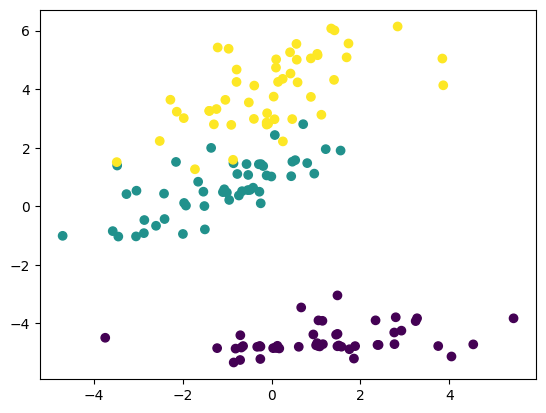

In [5]:
x1=X_projected[:,0]
x2=X_projected[:,1]
plt.scatter(x1,x2,c=y)
plt.show()